In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# the pseudo altitude grid (49 levels)

alt = np.array( (2.413e+02, 2.343e+02, 2.273e+02, 2.203e+02, 2.133e+02, 2.063e+02, 1.993e+02, 1.923e+02, \
                 1.853e+02, 1.783e+02, 1.713e+02, 1.643e+02, 1.573e+02, 1.503e+02, 1.433e+02, 1.363e+02, \
                 1.293e+02, 1.223e+02, 1.153e+02, 1.083e+02, 1.013e+02, 9.430e+01, 8.730e+01, 8.030e+01, \
                 7.330e+01, 6.632e+01, 5.950e+01, 5.297e+01, 4.679e+01, 4.101e+01, 3.561e+01, 3.061e+01, \
                 2.600e+01, 2.179e+01, 1.796e+01, 1.453e+01, 1.149e+01, 8.845e+00, 6.591e+00, 4.728e+00, \
                 3.248e+00, 2.122e+00, 1.308e+00, 7.532e-01, 3.977e-01, 1.870e-01, 7.477e-02, 2.354e-02, \
                 4.481e-03) )

In [3]:
# polynomial coefficients for fits to mean profile and Fourier coeeficients 
# amp(z)  = a0 + a1*z + a2*z2 + a3*z3 + a4*z4  + a5*z5

amp0 = np.array( (  1.90e+02, -2.14e+00, 4.68e-02, -4.52e-04, 1.52e-06, -5.86e-10) )
amp1 = np.array( ( -3.61e+01, 5.27e-01, 1.53e-02, -3.45e-04, 2.29e-06, -5.02e-09) )
amp2 = np.array( ( -8.36e+00, 2.22e-01, -7.06e-03, 9.44e-05, -4.82e-07, 8.46e-10) ) 
amp3 = np.array( ( -3.70e-01, 3.33e-01, -1.74e-02, 2.53e-04, -1.42e-06, 2.80e-09) )
amp4 = np.array( ( 1.72e+00, -3.29e-02, -4.64e-04, -2.80e-06, 1.24e-07, -4.84e-10) )


In [4]:
# create latitude array and tref array
nlat = 36
lat = np.arange(nlat)*5-87.5
tref = np.zeros((49,nlat))

In [26]:
# create z^2, z^3 etc
z = alt
z2 = z*z
z3 = z*z2
z4 = z2*z2
z5 = z2*z3

In [27]:
amp = np.zeros((49,5))
for i in np.arange(9,49):
    amp[i,0] = amp0[0] + amp0[1]*z[i] + amp0[2]*z2[i] + amp0[3]*z3[i] + amp0[4]*z4[i] + amp0[5]*z5[i]
    amp[i,1] = amp1[0] + amp1[1]*z[i] + amp1[2]*z2[i] + amp1[3]*z3[i] + amp1[4]*z4[i] + amp1[5]*z5[i]
    amp[i,2] = amp2[0] + amp2[1]*z[i] + amp2[2]*z2[i] + amp2[3]*z3[i] + amp2[4]*z4[i] + amp2[5]*z5[i]
    amp[i,3] = amp3[0] + amp3[1]*z[i] + amp3[2]*z2[i] + amp3[3]*z3[i] + amp3[4]*z4[i] + amp3[5]*z5[i]
    amp[i,4] = amp4[0] + amp4[1]*z[i] + amp4[2]*z2[i] + amp4[3]*z3[i] + amp4[4]*z4[i] + amp4[5]*z5[i]


In [33]:
y = 2.*(np.radians(lat)+0.5*np.pi)

cosy = np.cos(y)
cos2y = np.cos(2*y)
cos3y = np.cos(3*y)
cos4y = np.cos(4*y)

for i in np.arange(9,49):
    tref[i,:] = amp[i,0] \
             + amp[i,1]*cosy \
             + amp[i,2]*cos2y \
             + amp[i,3]*cos3y \
             + amp[i,4]*cos4y

tref[0:9,:] = tref[9,:]

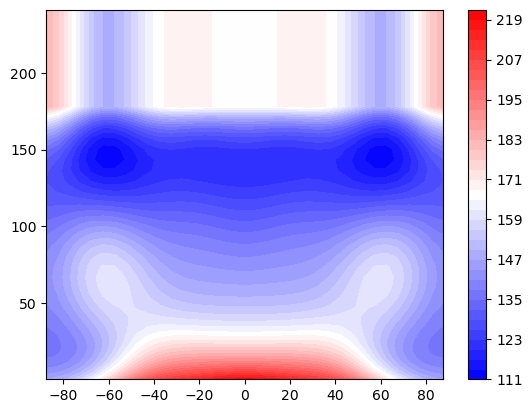

In [34]:
# plot tref

im = plt.contourf(lat,alt,tref, levels=41, cmap='bwr')

plt.colorbar(im)
plt.show()    

In [30]:
import xarray as xr

In [31]:
data_dir = '/glade/u/home/marsh/scratch/LMD/LMD_MARS_r2801_Mg_17Oct2022/'
ds = xr.open_dataset(data_dir+'LMD_MARS_r2801_Mg_17Oct2022_diagfi_MY32_01.nc', decode_times=False)

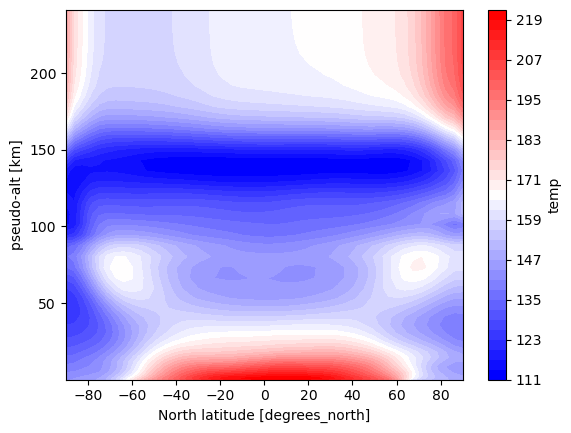

In [ ]:
ds.temp.mean(dim='longitude').plot.contourf(levels=41, cmap='bwr')
plt.show()